In [1]:
## Variability of results

# Inter and intra system (personal vs cluster architecture)
#


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from plotnine import *
import glob
import os

In [3]:
## create data frame with combinations of hyperparameters and results
# 2018_8_3: update to read all lines=epochs available
# 2018_8_15: update to read_csv function for speed, make function
# 2018_8_22: update to input name-len which is length of model name-1

def read_pipeline_results_V2(name = 'results/data1/*.csv',
                         cols_par=['model','alpha','beta1',
                                   'beta2','epsilon',
                                   'lrs_drop','lrs_treshold',
                                   'dropout','mbatch','replicate'],
                            name_len = 1):

    # define stuff
    cols_res = ['epoch','loss_train','r2_train','loss_val','r2_val','loss_test','r2_test']
    results = pd.DataFrame(np.nan,index=range(1),dtype='float32',columns=cols_par+cols_res)
    filelist = glob.glob(name)

    for i in filelist:
       # reset frames 
        results_tmp1 = pd.DataFrame(np.nan,index=range(1),dtype='float32',columns=cols_par)

        # read parameters
        results_tmp1.iloc[0,0] = str(i.split('/', 1)[1].split('_')[0+name_len])
        results_tmp1.iloc[0,1] = float(i.split('/', 1)[1].split('_')[1+name_len])
        results_tmp1.iloc[0,2] = float(i.split('/', 1)[1].split('_')[2+name_len])
        results_tmp1.iloc[0,3] = float(i.split('/', 1)[1].split('_')[3+name_len])
        results_tmp1.iloc[0,4] = float(i.split('/', 1)[1].split('_')[4+name_len])
        results_tmp1.iloc[0,5] = float(i.split('/', 1)[1].split('_')[5+name_len])
        results_tmp1.iloc[0,6] = float(i.split('/', 1)[1].split('_')[6+name_len])
        results_tmp1.iloc[0,7] = float(i.split('/', 1)[1].split('_')[7+name_len])
        results_tmp1.iloc[0,8] = float(i.split('/', 1)[1].split('_')[8+name_len])
        results_tmp1.iloc[0,9] = float(i.split('/', 1)[1].split('_')[9+name_len].split('.')[0])

#         # read parameters
#         results_tmp1.at[0,'model'] = str(i.split('/', 1)[1].split('_')[2])
#         results_tmp1.at[0,'alpha'] = float(i.split('/', 1)[1].split('_')[3])
#         results_tmp1.at[0,'beta1'] = float(i.split('/', 1)[1].split('_')[4])
#         results_tmp1.at[0,'beta2'] = float(i.split('/', 1)[1].split('_')[5])
#         results_tmp1.at[0,'epsilon'] = float(i.split('/', 1)[1].split('_')[6])
#         results_tmp1.at[0,'lrs_drop'] = float(i.split('/', 1)[1].split('_')[7])
#         results_tmp1.at[0,'lrs_treshold'] = float(i.split('/', 1)[1].split('_')[8])
#         results_tmp1.at[0,'dropout'] = float(i.split('/', 1)[1].split('_')[9])
#         results_tmp1.at[0,'mbatch'] = float(i.split('/', 1)[1].split('_')[10].split('.')[0])
        
        # read results
        results_tmp2 = pd.read_csv(i)
        results_tmp2['epoch'] = results_tmp2['epoch']+1
        results_tmp2.rename(columns={"loss":"loss_train","coef_det_k":"r2_train","val_loss":"loss_val","val_coef_det_k":"r2_val"},inplace=True)
        results_tmp2.drop(['corr_coef_k','val_corr_coef_k'],axis=1,inplace=True)

        # reshape, concatenate, append
        results_tmp1 = pd.concat([results_tmp1]*results_tmp2.shape[0],ignore_index=True)
        results = results.append(pd.concat([results_tmp1,results_tmp2],axis=1))

        # read .csv_testset, always add to last one
        results_tmp3 = pd.read_csv(i+'_testset')
        results_tmp3.rename(columns={"test_loss":"loss_test","test_coef_det_k":"r2_test"},inplace=True)
        results_tmp3.drop(['test_corr_coef_k','test_corr_coef_plot'],axis=1,inplace=True)
        results.iloc[-1,6] = results_tmp3['loss_test'].values
        results.iloc[-1,9] = results_tmp3['r2_test'].values

        # clean
        results = results.reset_index(drop=True)

    # clean out of loop
    return results.drop(0).reset_index(drop=True)


In [9]:
results1 = read_pipeline_results_V2(name = 'exp1-old_script/results/data1/*.csv')
results2 = read_pipeline_results_V2(name = 'exp2-random_fix_1/results/data1/*.csv')


In [5]:
## select best results within 95% window
results1[results1['r2_val'] > max(results1['r2_val'])*0.99]

,alpha,beta1,beta2,dropout,epoch,epsilon,loss_test,loss_train,loss_val,lrs_drop,lrs_treshold,mbatch,model,r2_test,r2_train,r2_val,replicate
94,0.0001,0.9,0.999,0.0,95.0,1.000000e-08,NaN,0.258197,0.242136,0.00000,10.0,64.0,Xval,NaN,0.430994,0.476127,3.0
95,0.0001,0.9,0.999,0.0,96.0,1.000000e-08,NaN,0.258431,0.241502,0.00000,10.0,64.0,Xval,NaN,0.431848,0.477685,3.0
96,0.0001,0.9,0.999,0.0,97.0,1.000000e-08,NaN,0.259171,0.242218,0.00000,10.0,64.0,Xval,NaN,0.428498,0.476448,3.0
97,0.0001,0.9,0.999,0.0,98.0,1.000000e-08,NaN,0.259306,0.241722,0.00000,10.0,64.0,Xval,NaN,0.429939,0.477915,3.0
98,0.0001,0.9,0.999,0.0,99.0,1.000000e-08,NaN,0.253673,0.241452,0.00000,10.0,64.0,Xval,NaN,0.445582,0.478393,3.0
99,0.0001,0.9,0.999,0.0,100.0,1.000000e-08,NaN,0.251849,0.242825,0.00000,10.0,64.0,Xval,NaN,0.449273,0.475136,3.0
102,0.0001,0.9,0.999,0.0,103.0,1.000000e-08,0.357745,0.247946,0.243542,0.22474,10.0,64.0,Xval,NaN,0.456931,0.473820,3.0


In [6]:
results1.groupby(by='replicate')['r2_val'].max()

replicate
1.0   -32.876777
2.0   -14.854467
3.0     0.478393
Name: r2_val, dtype: float64

In [7]:
results1.groupby(by='replicate').max()

,alpha,beta1,beta2,dropout,epoch,epsilon,loss_test,loss_train,loss_val,lrs_drop,lrs_treshold,mbatch,model,r2_test,r2_train,r2_val
replicate,,,,,,,,,,,,,,,,
1.0,0.0001,0.9,0.999,0.0,58.0,1.000000e-08,0.303154,16.810487,18.621473,0.343043,10.0,64.0,Xval,NaN,0.410377,-32.876777
2.0,0.0001,0.9,0.999,0.0,57.0,1.000000e-08,0.261868,16.513192,15.797877,0.432513,10.0,64.0,Xval,NaN,0.446467,-14.854467
3.0,0.0001,0.9,0.999,0.0,103.0,1.000000e-08,0.357745,17.009591,14.398608,0.224740,10.0,64.0,Xval,NaN,0.456931,0.478393


In [10]:
results2.groupby(by='replicate').max()

,alpha,beta1,beta2,dropout,epoch,epsilon,loss_test,loss_train,loss_val,lrs_drop,lrs_treshold,mbatch,model,r2_test,r2_train,r2_val
replicate,,,,,,,,,,,,,,,,
1.0,0.0001,0.9,0.999,0.0,124.0,1.000000e-08,0.232661,16.601622,15.296897,0.495806,10.0,64.0,Xval,NaN,0.517751,-3.378327
2.0,0.0001,0.9,0.999,0.0,124.0,1.000000e-08,0.232661,16.601622,15.296897,0.495806,10.0,64.0,Xval,NaN,0.517751,-3.378327
3.0,0.0001,0.9,0.999,0.0,124.0,1.000000e-08,0.232661,16.601622,15.296897,0.495806,10.0,64.0,Xval,NaN,0.517751,-3.378327


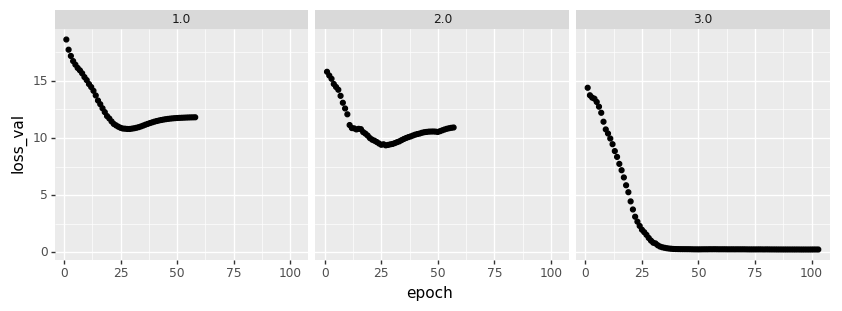

<ggplot: (-9223372029317677480)>


In [11]:
# all parameters are held constant, 

# # learning curves
# tmpcol = results['dr'].astype(str)+'_'+results['batch'].astype(str)
# tmplot = results.drop(['dr','batch'], axis=1)
# tmplot = tmplot.assign(dr_batch=tmpcol)

import plotnine as pn

#tmplot = results1[(results1['loss_val']<10)]
tmplot = results1

pn.options.figure_size=(10,3)
p = (pn.ggplot(tmplot)
 + aes('epoch','loss_val')
 + geom_point()
 + facet_wrap('replicate'))
print(p)


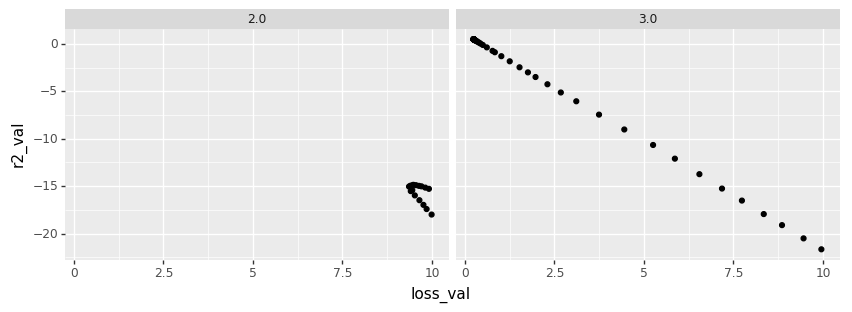

<ggplot: (-9223372036572661721)>


In [12]:
# loss vs r2
# remove outliers
tmplot = results1[(results1['loss_val']<10)]
#tmplot = results1

pn.options.figure_size=(10,3)
p = (pn.ggplot(tmplot)
 + aes('loss_val','r2_val')
 + geom_point()
 + facet_wrap('replicate'))
print(p)


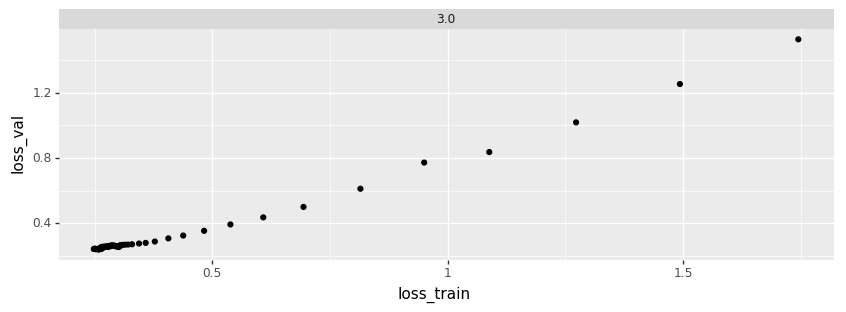

<ggplot: (-9223372029317491726)>


In [13]:
# loss train val
# remove outliers
tmplot = results1[(results1['loss_val']<2)&
                 (results1['loss_train']<2)]
#tmplot = results1

pn.options.figure_size=(10,3)
p = (pn.ggplot(tmplot)
 + aes('loss_train','loss_val')
 + geom_point()
 + facet_wrap('replicate'))
print(p)


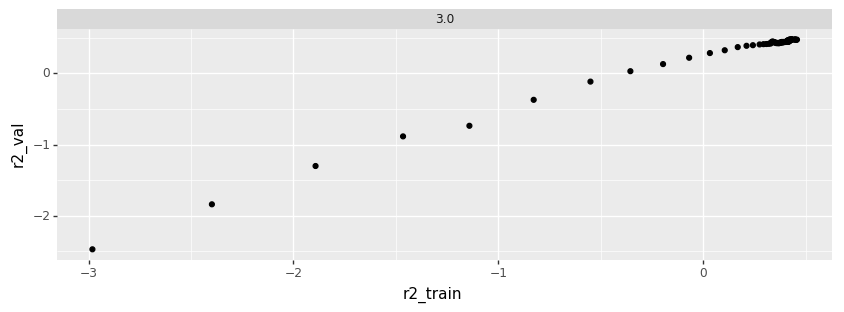

<ggplot: (-9223372029317768188)>


In [14]:
# r2 train val
# remove outliers
tmplot = results1[(results1['loss_val']<2)&
                 (results1['loss_train']<2)]
#tmplot = results1

pn.options.figure_size=(10,3)
p = (pn.ggplot(tmplot)
 + aes('r2_train','r2_val')
 + geom_point()
 + facet_wrap('replicate'))
print(p)


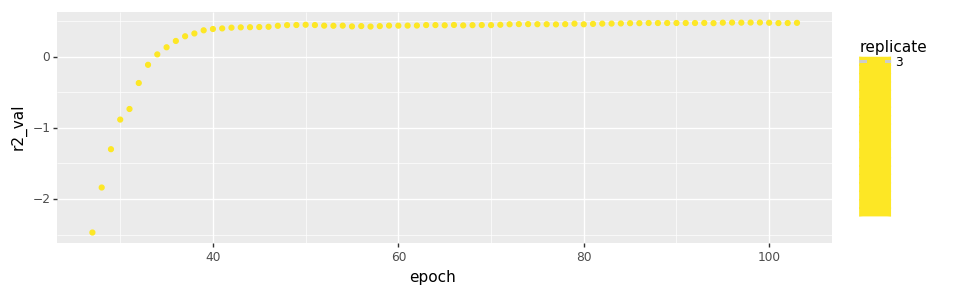

<ggplot: (-9223372029317434848)>


In [15]:
# r2 val replicate1 vs replicate2
tmplot = results1[(results1['loss_val']<2)&
                 (results1['loss_train']<2)]
#tmplot = results1

pn.options.figure_size=(10,3)
p = (pn.ggplot(tmplot)
 + aes('epoch','r2_val',color='replicate')
 + geom_point())
print(p)
